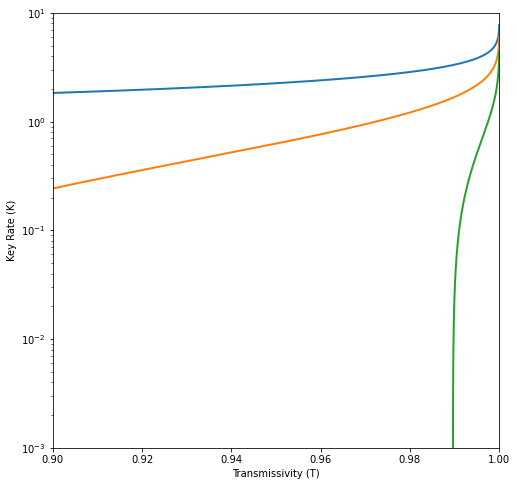

In [35]:
import numpy as np
from cmath import sqrt,log
from matplotlib import pyplot as plt
from numpy.linalg import det
from numpy import transpose

fig, ax = plt.subplots(figsize=(8, 8))

def g(x):
  f = ((x+1)/2)*log(((x+1)/2),2) - ((x-1)/2)*log(((x-1)/2),2)
  return f

# Key rate for RR with homodyne detection, link to paper:
# Quantum Cryptography Approaching the Classical Limit
# https://arxiv.org/abs/1004.3345

T = np.linspace(0.90000,0.99999,10000)
V0 = [1,10,100]
Vs = 10**5
W = 1.001
for j in range(len(V0)):
  V = Vs + V0[j]
  key = []
  for i in range(len(T)):
   
    Iab = 0.5*log(((1-T[i])*W + T[i]*Vs + T[i]*V0[j])/((1-T[i])*W + T[i]*V0[j]),2)

    ev = (1-T[i])*V + T[i]*W
    v1_E = 0.5*(sqrt((ev+W)**2 - 4*T[i]*(W**2-1)) + (ev-W) )
    v2_E = 0.5*(sqrt((ev+W)**2 - 4*T[i]*(W**2-1)) - (ev-W) )

    A = np.array([[(V*W)/(T[i]*(V-W)+W), 0],[0, (1-T[i])*V + T[i]*W]])
    B = np.array([[(1-T[i]+T[i]*W*V)/(T[i]*V+W-T[i]*W) , 0],[0 , W]])
    C = np.array([[sqrt(T[i]*W**2-1) * ((V)/(T[i]*V+W-T[i]*W)), 0 ],[0,  -sqrt(T[i]*(W**2-1))]])
    V_EB = np.array([[A , C],[transpose(C) , B]])
    delta = det(A) + det(B) + 2*det(C)
    V_EB_det = det(A@B - C@transpose(C))
    v1_EB = sqrt(0.5*(delta + sqrt(delta**2 - 4*(V_EB_det))))
    v2_EB = sqrt(0.5*(delta - sqrt(delta**2 - 4*(V_EB_det))))

    X = g(v1_E) + g(v2_E) - g(v1_EB) - g(v2_EB)

    key.append(Iab - X)
    key[i] = key[i].real  #a very small complex part(~10^-5 appears for some reason) which has to be rejected
  plt.plot(T,key,linewidth=2)

plt.ylim(10**-3, 10)
plt.xlim(0.9,1)
plt.yscale('log')
plt.xlabel('Transmissivity (T)')
plt.ylabel('Key Rate (K)')
plt.show()



